## Contents
    1. Importing libraries and data
    2. Data cleaning
       a. Finding and addressing duplicate rows
       b. Finding and addressing irrelevant values
       c. Finding and addressing outliers
       d. Additional changes to load data into SQL
    3. Exporting data

# 01. Importing libraries and data

In [3]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
#Importing data
path=r'C:\Users\munav\Desktop\bootcamps\Projects\Playstore Project\02. Data'
df=pd.read_csv(os.path.join(path, 'Original Data', 'playstore_reviews.csv'))

In [5]:
#checking the imported data
df.shape

(64295, 5)

In [6]:
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [7]:
df.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [8]:
df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


# 02. Data cleaning

### a. Finding and addressing duplicate rows


In [9]:
#Finding duplicate values
df_dups = df[df.duplicated(keep='last')]
df_dups.shape

(33616, 5)

In [10]:
df_dups.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [11]:
df.loc[df['Translated_Review']=='Works great especially going grocery store']

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.4,0.875
103,10 Best Foods for You,Works great especially going grocery store,Positive,0.4,0.875


In [12]:
#Dropping duplicate values
df=df.drop_duplicates(keep='last')

In [13]:
df.shape

(30679, 5)

### b. Finding and addressing irrelevant values

In [14]:
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
100,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
101,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
103,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
104,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
105,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [15]:
df.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.25
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.00
64230,Housing-Real Estate & Property,"Useless app, I searched flats kondapur, Hydera...",Negative,-0.316667,0.40
64235,Housing-Real Estate & Property,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [17]:
#Removing special characters
df['App']=df['App'].str.replace('[^a-zA-Z0-9\s]', '')
df['Translated_Review']=df['Translated_Review'].str.replace('[^a-zA-Z0-9\s]', '')

C:\Users\munav\AppData\Local\Temp\ipykernel_6572\2886061959.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['App']=df['App'].str.replace('[^a-zA-Z0-9\s]', '')
C:\Users\munav\AppData\Local\Temp\ipykernel_6572\2886061959.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Translated_Review']=df['Translated_Review'].str.replace('[^a-zA-Z0-9\s]', '')


In [18]:
df.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64226,HousingReal Estate Property,Dumb app I wanted post property rent give opti...,Negative,-0.287500,0.25
64227,HousingReal Estate Property,I property business got link SMS happy perform...,Positive,0.800000,1.00
64230,HousingReal Estate Property,Useless app I searched flats kondapur Hyderaba...,Negative,-0.316667,0.40
64235,HousingReal Estate Property,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [19]:
#Finding unique values in Sentiment column
print(df['Sentiment'].unique())

['Positive' 'Neutral' nan 'Negative']


In [20]:
#Finding unique values in Sentiment_Polarity
print(df['Sentiment_Polarity'].unique())

[ 1.          0.25        0.4        ... -0.52857143 -0.37777778
  0.17333333]


In [21]:
#Suppressing scientific notation and resetting display options
np.set_printoptions(suppress=True)
pd.options.display.max_columns = None
pd.options.display.max_rows = None
np.set_printoptions(threshold=np.inf)

In [22]:
#Finding unique values in Sentiment_Polarity
print(df['Sentiment_Polarity'].unique())

[ 1.          0.25        0.4         0.6         0.          0.7
  0.2         0.75        0.9921875   0.55               nan  0.45
  0.6         0.295       0.65        0.35        0.78125     0.65
  0.5         0.805      -0.5         0.18661616  0.45       -0.2
  0.44375     0.56666667  0.55        0.1         0.3         0.39
  0.8         0.35        0.33333333  0.51666667  0.675      -0.8
  0.46666667  0.43333333  0.43611111  0.2625      0.71212121 -0.325
  0.4         0.57916667  0.41071429  0.62666667 -0.1125      0.54166667
  0.91        0.01666667  0.23333333  0.46666667  0.38253968  0.28888889
  0.05714286  0.55444444  0.69066667 -1.          0.23666667  0.00277778
 -0.390625   -0.325       0.17045455  0.025       0.28333333 -0.30833333
 -0.05        0.13636364  0.28571429  0.2         0.16666667 -0.08680556
 -0.19444444 -0.3         0.26666667  0.21666667  0.39791667  0.275
  0.31666667  0.21111111  0.2875      0.48777778  0.56333333  0.83854167
 -0.16666667  0.33901515  0

In [23]:
#Finding unique values in Sentiment_Subjectivity column
print(df['Sentiment_Subjectivity'].unique())

[0.53333333 0.28846154 0.875      0.3        0.9        0.
 0.6        0.1        0.86666667 0.51111111        nan 1.
 0.66666667 0.8        0.35       0.5        0.69       0.2
 0.75       0.675      0.6        0.35631313 0.55       0.15
 0.4125     0.525      0.65       0.83333333 0.46666667 0.83333333
 0.36666667 0.5968254  0.45       0.73484848 0.475      0.4
 0.68333333 0.28571429 0.62222222 0.78       0.71666667 0.25
 0.275      0.63333333 0.58730159 0.67460317 0.14285714 0.76666667
 0.73866667 0.30166667 0.36388889 0.05       0.45454545 0.375
 0.47777778 0.45833333 0.53571429 0.33333333 0.5625     0.32430556
 0.41666667 0.775      0.91666667 0.54166667 0.71666667 0.35714286
 0.4        0.8        0.79166667 0.06666667 0.64393939 0.7
 0.51666667 0.70555556 0.64761905 0.57916667 0.47896825 0.59444444
 0.37777778 0.7047619  0.36363636 0.50625    0.575      0.7
 0.52       0.975      0.57222222 0.19166667 0.45       0.65
 0.32590909 0.69666667 0.68796296 0.55833333 0.85       0.6444

#### There doesn't seem to be irrelevant values in the above column, but we will also check for mixed data types.

In [24]:
#checking the data type of each column
df.dtypes

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

In [25]:
#Finding mixed data column
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)

Translated_Review
Sentiment


### c. Finding and addressing outliers

<AxesSubplot:xlabel='Sentiment_Polarity', ylabel='Count'>

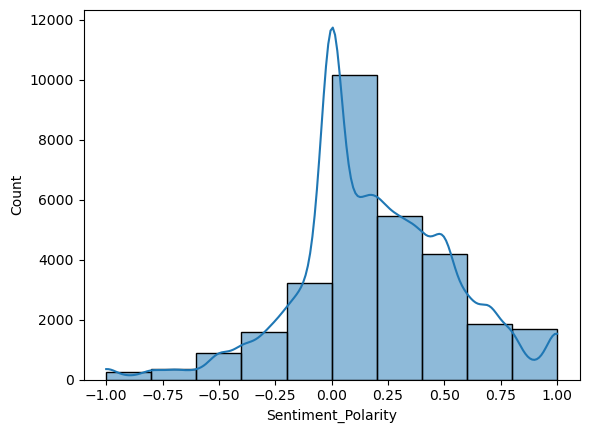

In [26]:
#Checking for outliers in Sentiment_Polarity column
sns.histplot(df['Sentiment_Polarity'], bins = 10, kde = True)

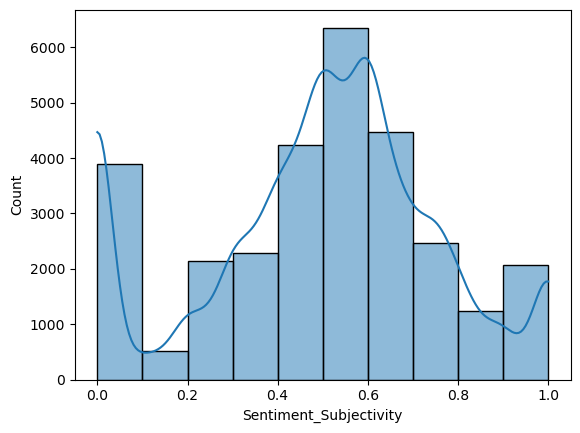

In [27]:
#Checking for outliers in Sentiment_Subjectivity column
sns.histplot(df['Sentiment_Subjectivity'], bins = 10, kde = True)
plt.ticklabel_format(style='plain', axis='x')

#### There doesn't seem to be any irrelevant values in the columns above.

### d. Additional changes to load data into SQL

In [28]:
df.shape

(30679, 5)

In [29]:
#Removing rows with missing values in Translated_Reviews column
df=df.dropna(subset=['Translated_Review'])
df.shape

(29692, 5)

In [30]:
#Checking for missing values in other columns
df.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

# 03. Exporting data

In [31]:
df.to_csv(os.path.join(path, 'Prepared Data', 'Playstore_reviews_clean.csv'))